# P6 - Analysez les ventes d'une librairie avec Python

## Préparation des fichiers

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np, math
import matplotlib.pyplot as plt
import scipy.stats as st

Création d'une classe pour améliorer le style du texte.

In [2]:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'

Importation des fichiers csv.

In [3]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

Affichage des fichiers.

In [6]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [7]:
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [8]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


## Vérification des clés

- Vérification des valeurs manquantes dans les dataframes :

In [76]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [77]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [78]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

<u><strong>Conclusion :</strong></u> Les dataframes n'ont pas de valeurs manquantes.

- Vérification des clés uniques sur les clés primaires et secondaires :

In [13]:
customers['client_id'].nunique()

8623

In [11]:
len(customers)

8623

In [14]:
products['id_prod'].nunique()

3287

In [15]:
len(products)

3287

<strong>Observation :</strong> Les clés primaires des dataframes <i>customers</i> et <i>products</i> ont des valeurs uniques égales au nombre total de chaque dataframe.

In [51]:
transactions['id_prod'].nunique()

3266

In [52]:
transactions['client_id'].nunique()

8600

In [53]:
len(transactions)

679332

**Observation :** Les clés secondaires du dataframe <i>transactions</i> ont des valeurs uniques restreintes par rapport au nombre total du dataframe. 

## Nettoyage

* Vérification et correction des erreurs de types :

In [3]:
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [4]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [9]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

**Observation :** <i>transactions['date']</i> a une erreur de type. Pour le modifier, il faut supprimer d'abord les chaînes de caratères des valeurs afin qu'elles soient exploitables.

In [4]:
transactions = transactions[transactions['date'].map(lambda x: 'test' not in x)]

In [5]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [6]:
transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

<u>**Conclusion :**</u> Les erreurs de types ont été corrigées.

* Doublons :

In [6]:
products.loc[products[['id_prod', 'price','categ']].duplicated(keep=False),:]

,id_prod,price,categ


In [7]:
customers.loc[customers[['client_id','sex','birth']].duplicated(keep=False),:]

,client_id,sex,birth


In [8]:
transactions.loc[transactions[['id_prod','date','session_id','client_id']].duplicated(keep=False),:]

,id_prod,date,session_id,client_id


<u>**Conclusion :**</u> Il n'y a pas de doublons dans les dataframes.

* Outliers

In [9]:
products['price'].describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

**Observation :** Il y a une incohérence dans le minimun du prix des produits. Je supprime toutes les valeurs aberrantes en-dessous de 0.

In [6]:
products.loc[products['price'] == -1,:]

,id_prod,price,categ
731,T_0,-1.0,0


In [7]:
list_product = list(filter(lambda x: 'T' in x, products['id_prod']))
print(list_product)

['T_0']


In [8]:
products = products[products['id_prod'].map(lambda x: 'T' not in x)]

In [10]:
products['price'].describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

<u>**Conclusion :**</u> Le minimun de prix est maintenant cohérent.

    - Méthode de l'écart interquartile

Deux méthodes sont testées.

In [9]:
np.percentile(products['price'],[25,75])

array([ 6.99, 22.99])

In [10]:
q1, q3= np.percentile(products['price'],[25,75])
iqr = q3 - q1
print(iqr)

15.999999999999998


In [11]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print(lower_bound)
print(upper_bound)

-17.009999999999998
46.989999999999995


In [12]:
out_upper_bound = products.loc[products['price'] > upper_bound]
print(out_upper_bound.sort_values('price',ascending=False))
print(color.BOLD + 'Nombre d\'outliers : ' + color.END, len(out_upper_bound))

     id_prod   price  categ
947      2_2  300.00      2
724     2_76  254.44      2
394    2_158  247.22      2
1436   2_167  236.99      2
2779    2_30  233.54      2
...      ...     ...    ...
3169   1_626   47.35      1
2966   1_620   47.30      1
49      1_48   47.22      1
2266   1_569   46.99      1
1164   2_155   46.99      2

[302 rows x 3 columns]
Nombre d'outliers :  302


In [13]:
out_lower_bound = products.loc[products['price'] < lower_bound]
print(out_lower_bound.sort_values('price', ascending=False))
print(color.BOLD + 'Nombre d\'outliers : ' + color.END , len(out_lower_bound))

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []
Nombre d'outliers :  0


    - Méthode Zscore

In [14]:
mean = np.mean(products['price'])
std = np.std(products['price'])
print(color.BOLD + 'Mean : ' + color.END, mean)
print(color.BOLD + 'std. : ' + color.END, std)

Mean :  21.863597078514857
std. :  29.845243318099012


In [15]:
threshold = 2
outlier = []
for i in products['price']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print(color.BOLD +'Outliers du dataframe : \n' + color.END, outlier)

Outliers du dataframe : 
 [225.17, 107.99, 157.99, 157.99, 201.74, 156.99, 134.57, 157.99, 158.17, 127.99, 88.99, 167.49, 111.99, 103.99, 82.99, 157.42, 115.3, 247.22, 83.99, 86.99, 162.03, 127.39, 89.43, 104.78, 116.98, 130.99, 170.99, 109.99, 131.99, 145.45, 130.99, 175.99, 254.44, 96.56, 86.99, 228.11, 181.99, 103.92, 106.52, 84.29, 93.99, 172.99, 110.08, 300.0, 98.99, 191.99, 116.99, 86.99, 157.63, 110.98, 89.54, 83.51, 155.99, 118.51, 104.06, 203.99, 145.99, 142.99, 123.99, 176.2, 175.67, 163.94, 104.76, 236.99, 100.56, 111.72, 100.99, 128.99, 142.99, 96.99, 189.99, 85.28, 220.99, 116.67, 182.3, 119.07, 85.27, 139.99, 83.63, 136.99, 222.97, 103.58, 87.4, 96.99, 114.99, 120.22, 141.32, 231.99, 101.99, 96.74, 93.48, 164.99, 105.99, 136.07, 136.99, 111.99, 182.3, 139.99, 88.99, 85.89, 129.11, 130.8, 150.72, 166.21, 99.99, 84.99, 90.99, 114.99, 111.99, 124.99, 96.88, 84.96, 202.99, 188.48, 230.04, 129.74, 132.36, 91.82, 130.99, 120.61, 142.99, 104.99, 115.75, 160.99, 138.53, 158.99, 1

In [16]:
print(color.BOLD + 'Nombre d\'outliers : ' + color.END, len(outlier))

Nombre d'outliers :  157


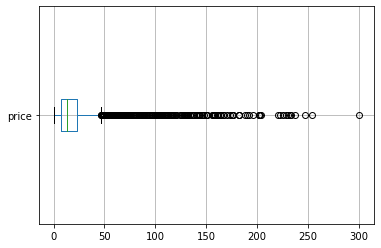

In [17]:
products.boxplot(column="price", vert=False)
plt.show()

<u>**Conclusion :**</u> Les outliers trouvés ne sont pas aberrants. Ils sont gardés dans le dataframe.

## Analyse des requêtes

*  Analyse univarié du Chiffre d'affaire

In [48]:
semi_data = transactions.merge(products, how='inner')
data_final = semi_data.merge(customers, how='inner')
data_final

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0,f,1986
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0,f,1986
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0,f,1986
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0,f,1986
...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2,f,2001
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0,f,1960
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0,f,1960
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2,m,1992


In [19]:
print(color.BOLD + 'Chiffre d\'affaires totale : ' + color.END + str(data_final['price'].sum()))

Chiffre d'affaires totale : 11853728.680000007


In [20]:
data_final[['categ','price']].groupby(by='categ').sum().sort_values('price', ascending=False)

,price
categ,
1,4.653723e+06
0,4.419731e+06
2,2.780275e+06


**Observation :** La catégorie 1 a le chiffre d'affaire le plus élevé.

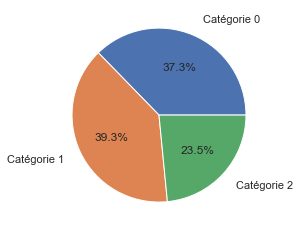

Text(0, 0.5, 'Montant des achats')

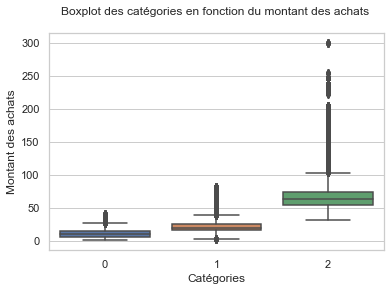

In [147]:
categ0_ca = data_final.loc[data_final['categ'] == 0, 'price'].sum()
categ1_ca = data_final.loc[data_final['categ'] == 1, 'price'].sum()
categ2_ca = data_final.loc[data_final['categ'] == 2, 'price'].sum()
categ_ca_array = np.array([categ0_ca, categ1_ca, categ2_ca])
labels = [' Catégorie 0','Catégorie 1','Catégorie 2']
plt.pie(categ_ca_array, labels=labels, autopct='%1.1f%%', pctdistance=0.6, labeldistance=1.2)
plt.show()

sns.boxplot( x=data_final["categ"], y=data_final["price"] )
plt.title('Boxplot des catégories en fonction du montant des achats \n')
plt.xlabel("Catégories")
plt.ylabel("Montant des achats")

**Observations :** La <i>Catégorie 1</i> occupe la partie la plus élevé du chiffre d'affaires (<i>39,3%</i>). <br/>
    La <i>Catégorie 2</i> bien qu'ayant le chiffre d'affaire le plus faible (<i>23,5%</i>), elle a les montants d'achats les plus élevé.

--------------------
Catégorie 0 

Moyenne :
 10.638
mediane :
 9.99
Mode :
 0    4.99
dtype: float64


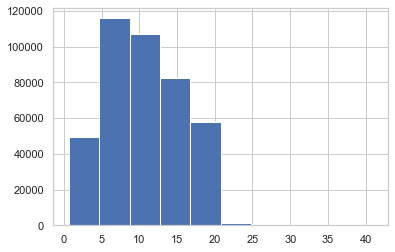

--------------------
Catégorie 1 

Moyenne :
 20.486
mediane :
 19.08
Mode :
 0    15.99
dtype: float64


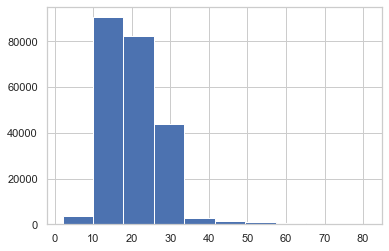

--------------------
Catégorie 2 

Moyenne :
 76.207
mediane :
 62.83
Mode :
 0    68.99
dtype: float64


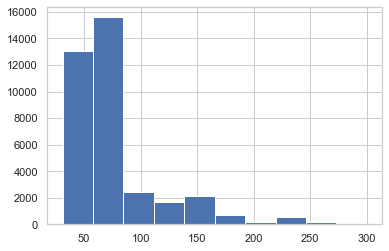

In [47]:
for cat in data_final["categ"].unique():
    subset = data_final.loc[data_final.categ == cat, :] # Création du sous-échantillon
    print("-"*20)
    print(color.UNDERLINE + 'Catégorie' ,cat,'\n' + color.END)
    print(color.BOLD + "Moyenne :\n" + color.END,round(subset['price'].mean(),3))
    print(color.BOLD + "mediane :\n" + color.END,subset['price'].median())
    print(color.BOLD + "Mode :\n" + color.END,subset['price'].mode())
    subset["price"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme

**Observation :** <br/>
La <i>Catégorie 0</i> a le montant d'achats le plus élevé entre 5 et 10. <br/>
La <i>Catégorie 1</i> a le montant d'achats le plus élevé entre 10 et 20. <br/>
La <i>Catégorie 2</i> a le montant d'achats le plus élevé entre 50 et 100.

* Le nombre de produits par catégorie

In [22]:
data_final[["categ","id_prod"]].groupby(by='categ').count().sort_values('id_prod',ascending=False)

,id_prod
categ,
0,415459
1,227169
2,36483


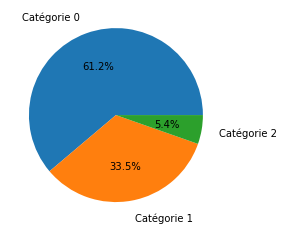

In [23]:
categ0 = data_final.loc[data_final['categ'] == 0, 'id_prod'].count()
categ1 = data_final.loc[data_final['categ'] == 1, 'id_prod'].count()
categ2 = data_final.loc[data_final['categ'] == 2, 'id_prod'].count()
categ_array = np.array([categ0, categ1, categ2])
labels = ['Catégorie 0','Catégorie 1','Catégorie 2']
plt.pie(categ_array, labels=labels, autopct='%1.1f%%', pctdistance=0.6, labeldistance=1.2)
plt.show()

**Observation :** La <i>catégorie 0</i> occupe **61.2 %** des produits présents.

## Analyse de l'évolution du chiffre d'affaire dans le temps

Création d'une colonne '<i>date_new_format</i>' pour une meilleur utilisation des dates.

In [84]:
data_final['date_new_format'] = data_final['date'].dt.strftime('%Y/%m/%d')
data_final['date_new_format']

0         2022/05/20
1         2021/07/20
2         2022/08/20
3         2022/06/18
4         2021/08/18
             ...    
679106    2021/07/23
679107    2022/03/25
679108    2021/09/25
679109    2021/03/11
679110    2022/07/11
Name: date_new_format, Length: 679111, dtype: object

Modification du type de '<i>date_new_format</i>'.

In [85]:
data_final['date_new_format'] = pd.to_datetime(data_final['date_new_format'])

[Text(0.5, 1.0, 'Lineplot des prix en fontion du temps \n')]

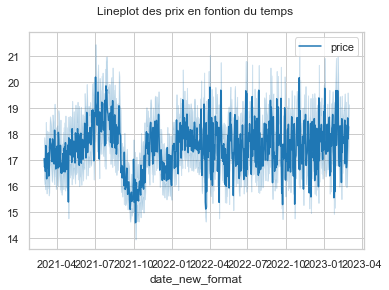

In [104]:
sns.set_theme(style="whitegrid")

price = data_final[data_final['price'] > 0]['price']
dates = data_final[data_final['date_new_format'] > '2020-03-01']['date_new_format']
data = pd.DataFrame(price.to_numpy(), dates, columns=["price"])
data = data.rolling(7).mean()
sns.lineplot(data=data, palette="tab10", linewidth=1.5).set(title='Lineplot des prix en fontion du temps \n')

**Observation :** On observe une chute des achats en <i>octobre 2021</i>.

## Décomposition en moyenne mobile

### Décomposition saisonnière des transactions

In [86]:
data_final_days = data_final.resample('D', on='date_new_format').session_id.count().reset_index()
data_final_days = data_final_days.rename(columns={"session_id": "transactions"})
data_final_days.index = data_final_days['date_new_format']
data_final_days

,date_new_format,transactions
date_new_format,,
2021-03-01,2021-03-01,962
2021-03-02,2021-03-02,939
2021-03-03,2021-03-03,911
2021-03-04,2021-03-04,903
2021-03-05,2021-03-05,943
...,...,...
2023-02-24,2023-02-24,894
2023-02-25,2023-02-25,905
2023-02-26,2023-02-26,890


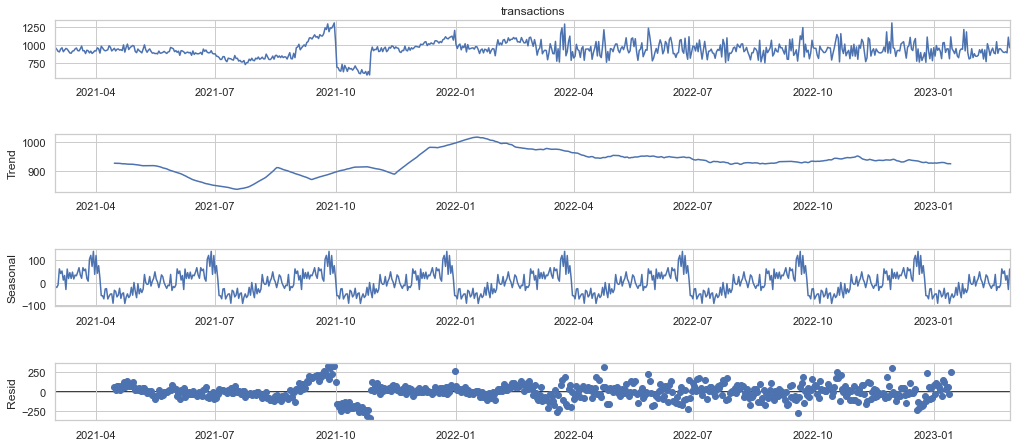

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
data_final_decomp = seasonal_decompose(data_final_days['transactions'],model='additive', period=90)
ax=data_final_decomp.plot()
fig = plt.gcf()
fig.set_size_inches(16, 7)
plt.show()

**Observations :** <br/> 
* <i>Trend:</i> On observe une diminution du nombre de connexion jusqu'en Juillet 2021, une augmentation juqu'en Janvier 2022 et enfin une courbe constante sur le reste du temps.
* <i>Seasonal:</i> On observe une régularité de trois mois répétitive.

### Décomposition du chiffre d'affaire

In [105]:
data_final_ca_days = data_final.resample('D', on='date_new_format').price.sum().reset_index()
data_final_ca_days = data_final_ca_days.rename(columns={"price": "Chiffre d'affaire"})
data_final_ca_days.index = data_final_ca_days['date_new_format']
data_final_ca_days

,date_new_format,Chiffre d'affaire
date_new_format,,
2021-03-01,2021-03-01,16565.22
2021-03-02,2021-03-02,15486.45
2021-03-03,2021-03-03,15198.69
2021-03-04,2021-03-04,15196.07
2021-03-05,2021-03-05,17471.37
...,...,...
2023-02-24,2023-02-24,15207.89
2023-02-25,2023-02-25,15761.25
2023-02-26,2023-02-26,16304.72


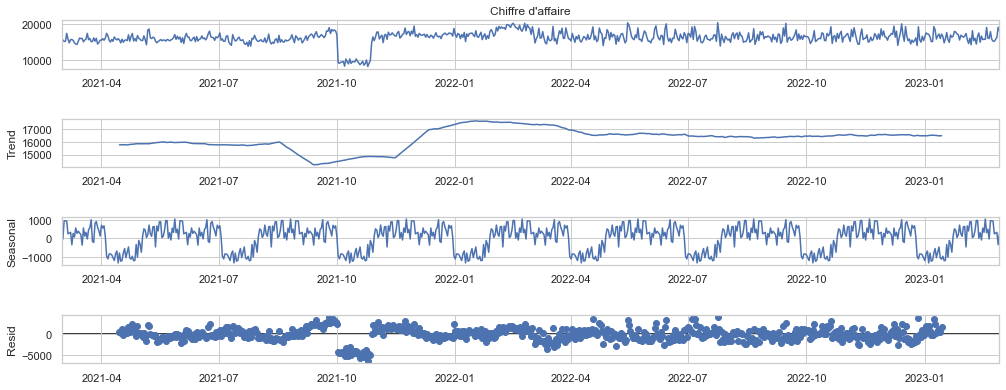

In [106]:
data_final_ca_decomp = seasonal_decompose(data_final_ca_days['Chiffre d\'affaire'],model='additive', period=90)
ax=data_final_ca_decomp.plot()
fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.show()

**Observations :** <br/>
* <i> Trend: </i> On observe une constante du chiffre d'affaire jusq'en Août 2021, une chute des vente sur un mois, une augmentation du chiffre d'affaire à partir de Septembre 2021 jusqu'en Janvier 2022, une légère diminution jusqu'en Avril 2022 et de nouveau une courbe constante du chiffre d'affaires sur le restant du temps.
* <i> Seasonal: </i> On observe une régularité de trois mois répétitive.

**Conclusion :** La chute du chiffre d'affaire en octobre 2021 est dû à la diminution du nombre de connexion.

## Analyse des profils des clients

- Le genre

In [43]:
data_final[['sex','client_id']].groupby(by='sex').count().sort_values('client_id',ascending=False)

,client_id
sex,
m,340826
f,338285


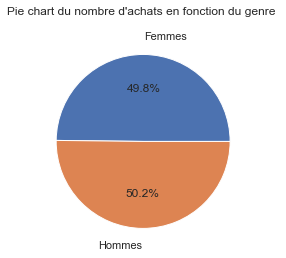

In [44]:
ca_f = data_final.loc[data_final['sex'] == 'f', 'client_id'].count()
ca_h = data_final.loc[data_final['sex'] == 'm', 'client_id'].count()
ca_genre_array = np.array([ca_f, ca_h])
labels = ['Femmes','Hommes']
plt.pie(ca_genre_array, labels=labels, autopct='%1.1f%%', pctdistance=0.6, labeldistance=1.2)
plt.title('Pie chart du nombre d\'achats en fonction du genre \n')
plt.show() 

**Observation :** Il y a plus d'hommes (<i>50.2%</i>) que de femmes (<i>49.8 %</i>) qui achètent.

- L'âge

Création d'une colonne '<i>age</i>' pour une meilleur utilisation de '<i>birth</i>'.

In [51]:
data_final['age'] = 2022 - data_final['birth']

In [52]:
data_final[['age','client_id']].groupby(by='age').count().sort_values('client_id',ascending=False)

,client_id
age,
42,47409
34,25000
43,24878
44,24659
36,23465
...,...
90,311
87,271
92,226


Création d'une colonne '<i>age_range</i>'.

In [53]:
data_final['age_range'] = pd.cut(x=data_final['age'], bins=[15,20,30,40,50,60,70,80,90,100])
data_final['age_range']

0         (30, 40]
1         (30, 40]
2         (30, 40]
3         (30, 40]
4         (30, 40]
            ...   
679106    (20, 30]
679107    (60, 70]
679108    (60, 70]
679109    (20, 30]
679110    (20, 30]
Name: age_range, Length: 679111, dtype: category
Categories (9, interval[int64]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

In [50]:
data_final[['age_range','client_id']].groupby(by='age_range').count().sort_values('client_id',ascending=False)

,client_id
age_range,
"(40, 50]",222905
"(30, 40]",196114
"(50, 60]",96226
"(20, 30]",55748
"(60, 70]",53093
"(15, 20]",24104
"(70, 80]",21617
"(80, 90]",8707
"(90, 100]",597


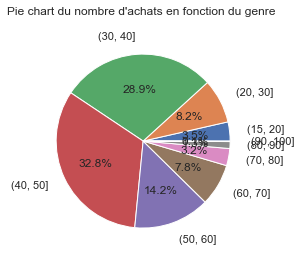

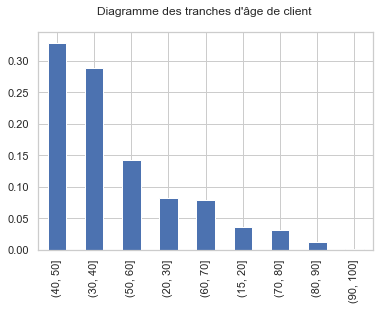

In [103]:
age1520 = data_final.loc[data_final['age_range'] == pd.Interval(left=15, right=20), 'client_id'].count()
age2030 = data_final.loc[data_final['age_range'] == pd.Interval(left=20, right=30), 'client_id'].count()
age3040 = data_final.loc[data_final['age_range'] == pd.Interval(left=30, right=40), 'client_id'].count()
age4050 = data_final.loc[data_final['age_range'] == pd.Interval(left=40, right=50), 'client_id'].count()
age5060 = data_final.loc[data_final['age_range'] == pd.Interval(left=50, right=60), 'client_id'].count()
age6070 = data_final.loc[data_final['age_range'] == pd.Interval(left=60, right=70), 'client_id'].count()
age7080 = data_final.loc[data_final['age_range'] == pd.Interval(left=70, right=80), 'client_id'].count()
age8090 = data_final.loc[data_final['age_range'] == pd.Interval(left=80, right=90), 'client_id'].count()
age90100 = data_final.loc[data_final['age_range'] == pd.Interval(left=90, right=100), 'client_id'].count()
age_rang_client_array = np.array([age1520,age2030,age3040,age4050,age5060,age6070,age7080,age8090,age90100])
labels = ['(15, 20]','(20, 30]','(30, 40]','(40, 50]','(50, 60]','(60, 70]','(70, 80]','(80, 90]',' (90, 100]']
plt.pie(age_rang_client_array, labels=labels, autopct='%1.1f%%', pctdistance=0.6, labeldistance=1.2)
plt.title('Pie chart du nombre d\'achats en fonction du genre \n')
plt.show() 

# Diagramme en tuyaux d'orgues
data_final["age_range"].value_counts(normalize=True).plot(kind='bar')
plt.title("Diagramme des tranches d'âge de client \n")
plt.show()

**Observation :** La tranche d'âge la plus élevée des clients est de 40-50 ans (<i>32,8%</i>).

## Répartition du Chiffre d'affaire en eux (Courbe de Lorenz)

In [63]:
depenses = data_final[data_final['price'] > 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print(color.BOLD + 'Indice de Gini : '+ color.END,gini)

Indice de Gini :  0.3954702179569495


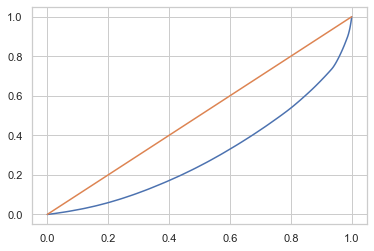

In [37]:
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.show()

**Observation :** La répartition du chiffre d'affaires est proche d'une situation d'égalité parfaite.

## Analyse

### Le lien entre le genre d'un client et les catégories des livres achetés (qualitatives)

In [108]:
X = "sex"
Y = "categ"

cont = data_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
Total,415459,227169,36483,679111


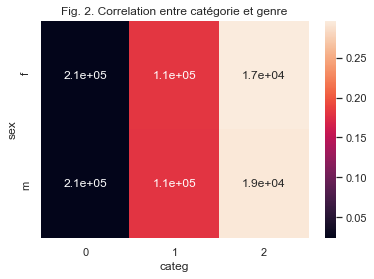

In [109]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data_final)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1]).set_title('Fig. 2. Correlation entre catégorie et genre')
plt.show()

* Test statistique (Khi-2)

In [114]:
chi, p, dof, ex = st.chi2_contingency(observed = cont)

In [113]:
print(color.BOLD + 'P_value : ' + color.END,p)

P_value :  3.144522803251581e-29


**Conclusion :** La p_value étant proche de 0, on peut conclure que l'association entre le genre des clients et les catégorie des produits est statistiquement significatif. Ces deux variables ne peuvent donc pas être considérées comme indépendantes.

### Le lien entre l'âge des clients et le montant des achats (quantitatives)

In [119]:
montant = data_final.groupby(by=['client_id'])['price'].sum()
montant

client_id
c_1        558.18
c_10      1353.60
c_100      254.85
c_1000    2261.89
c_1001    1812.86
           ...   
c_995      189.41
c_996     1625.58
c_997     1490.01
c_998     2779.88
c_999      701.40
Name: price, Length: 8600, dtype: float64

In [120]:
age = data_final.groupby(by=['client_id'])['age'].first()
age

client_id
c_1       67
c_10      66
c_100     30
c_1000    56
c_1001    40
          ..
c_995     67
c_996     52
c_997     28
c_998     21
c_999     58
Name: age, Length: 8600, dtype: int64

In [121]:
a = age
b = montant
age_montant = pd.DataFrame({"age":a, "montant":b})

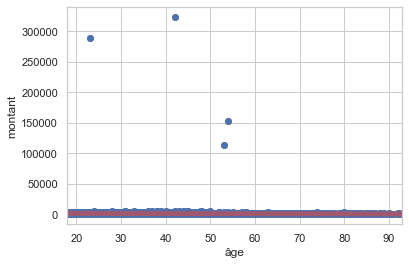

In [122]:
plt.plot(age,montant, "o")
sns.regplot(x=age_montant["age"], y=age_montant["montant"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel("âge")
plt.ylabel("montant")
plt.show()

**Observations :** On observe des outliers qui influencent l'analyse. 

* Outliers

Utilisation de la méthode z-score pour identifier les 4 outliers.

In [123]:
mean_montant = np.mean(age_montant['montant'])
std_montant = np.std(age_montant['montant'])
print(color.BOLD +'Mean : ' + color.END, mean_montant)
print(color.BOLD +'std. :' + color.END, std_montant)

Mean :  1378.3405441860389
std. : 5182.24116861651


In [124]:
threshold_montant = 2
outlier_montant = []
for i in age_montant['montant']:
    z_montant = (i-mean_montant)/std_montant
    if z_montant > threshold_montant:
        outlier_montant.append(i)
print( color.BOLD + 'Les outliers du dataframe : ' + color.END + '\n', outlier_montant)

Les outliers du dataframe : 
 [324033.34999993996, 113637.93000000644, 289760.339999994, 153598.92000000234]


* Nouvelle analyse sans les outliers

In [125]:
montant_outlier_out = ~age_montant.montant.isin(outlier_montant)
age_montant_bis = age_montant[montant_outlier_out]
age_montant_bis.sort_values('montant',ascending=False)

,age,montant
client_id,,
c_3263,37,5276.87
c_1570,43,5271.62
c_2899,28,5214.05
c_2140,45,5208.82
c_7319,48,5155.77
...,...,...
c_4648,18,11.20
c_240,24,11.06
c_8114,60,9.98


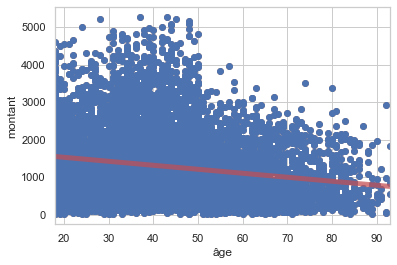

In [126]:
plt.plot(age_montant_bis['age'],age_montant_bis['montant'], "o")
sns.regplot(x=age_montant_bis["age"], y=age_montant_bis["montant"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel("âge")
plt.ylabel("montant")
plt.show()

* Test statistique

In [141]:
r1, p1 = st.pearsonr(age_montant_bis['age'],age_montant_bis['montant'])
print(color.BOLD + 'Coefficient de Pearson:' + color.END, round(r1, 5))
print(color.BOLD + 'p-value:' + color.END, round(p1, 5))

Coefficient de Pearson: -0.18838
p-value: 0.0


**Conclusion :** La corrélation est négativement faible entre l'âge des clients et le montant des achats.

### Le lien entre l'âge des clients et la fréquence d'achat (quantitatives)

In [128]:
freq = data_final.groupby(by='client_id')['session_id'].agg(len)
freq

client_id
c_1        39
c_10       58
c_100       8
c_1000    125
c_1001    102
         ... 
c_995      14
c_996      95
c_997      59
c_998      53
c_999      46
Name: session_id, Length: 8600, dtype: int64

In [129]:
a = age
b = freq
age_freq = pd.DataFrame({"age":a, "freq":b})

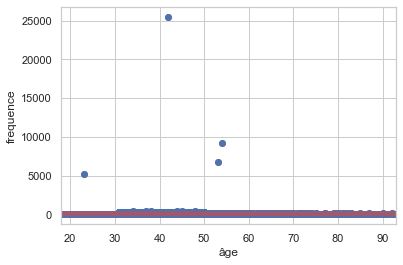

In [130]:
plt.plot(age_freq['age'],age_freq['freq'], "o")
sns.regplot(x=age_freq["age"], y=age_freq["freq"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel("âge")
plt.ylabel("frequence")
plt.show()

**Observations :** On observe des outliers qui influencent l'analyse. 

* Outliers

Utilisation de la méthode z-score pour identifier les 4 outliers.

In [133]:
mean_freq = np.mean(age_freq['freq'])
std_freq = np.std(age_freq['freq'])
print(color.BOLD + 'Mean : ' + color.END, mean_freq)
print(color.BOLD + 'std. : ' + color.END, std_freq)

Mean :  78.96639534883721
std. :  312.3847466142356


In [134]:
threshold_freq = 2
outlier_freq = []
for i in age_freq['freq']:
    z_freq = (i-mean_freq)/std_freq
    if z_freq > threshold_freq:
        outlier_freq.append(i)
print(color.BOLD +'Les outliers du dataframe : ' + color.END + '\n', outlier_freq)

Les outliers du dataframe : 
 [25488, 6770, 5195, 9181]


* Nouvelle analyse sans les outliers

In [135]:
freq_outlier_out = ~age_freq.freq.isin(outlier_freq)
age_freq_bis = age_freq[freq_outlier_out]
age_freq_bis.sort_values('freq',ascending=False)

,age,freq
client_id,,
c_3263,37,403
c_2140,45,402
c_2595,48,398
c_2077,38,384
c_1637,34,380
...,...,...
c_4478,52,1
c_8351,54,1
c_5962,25,1


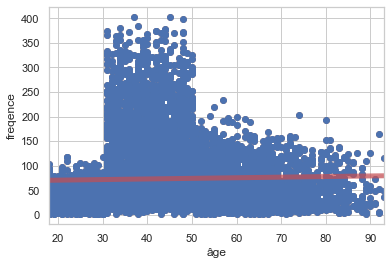

In [136]:
plt.plot(age_freq_bis['age'],age_freq_bis['freq'], "o")
sns.regplot(x=age_freq_bis["age"], y=age_freq_bis["freq"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel("âge")
plt.ylabel("freqence")
plt.show()

* Test Statistique

In [142]:
r2, p2 = st.pearsonr(age_freq_bis['age'],age_freq_bis['freq'])
print(color.BOLD + 'Coefficient de Pearson:' + color.END, round(r2, 5))
print(color.BOLD + 'p-value:'+ color.END, round(p2, 5))

Coefficient de Pearson: 0.03045
p-value: 0.00476


**Conclusion:** Il y a une abscence presque totale de corrélation. Les deux variables sont linéairement indépendantes.

### Le lien entre l'âge des clients et la taille du panier moyen (qualitatifs)

In [138]:
panier_moy = data_final.groupby(by='client_id')['price'].mean()
panier_moy

client_id
c_1       14.312308
c_10      23.337931
c_100     31.856250
c_1000    18.095120
c_1001    17.773137
            ...    
c_995     13.529286
c_996     17.111368
c_997     25.254407
c_998     52.450566
c_999     15.247826
Name: price, Length: 8600, dtype: float64

In [139]:
a = age
b = panier_moy
age_panier_moy = pd.DataFrame({"age":a, "panier_moy":b})

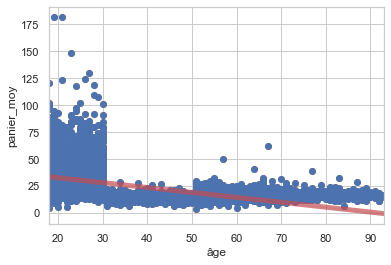

In [140]:
plt.plot(age,panier_moy, "o")
sns.regplot(x=age_panier_moy['age'], y=age_panier_moy['panier_moy'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel("âge")
plt.ylabel("panier_moy")
plt.show()

* Test statistique

In [144]:
r3, p3 = st.pearsonr(age_panier_moy['age'],age_panier_moy['panier_moy'])
print(color.BOLD + 'Coefficient de Pearson:' + color.END, round(r3, 3))
print(color.BOLD + 'p-value:'+ color.END, round(p3, 3))

Coefficient de Pearson: -0.513
p-value: 0.0


**Conclusion :** La corrélation est négativement faible entre l'âge des clients et le panier moyen d'achat.

### Le lien entre l'âge des clients et les catégories des livres achetés (ANOVA)

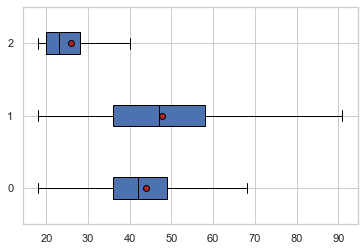

In [145]:
X = "categ" # qualitative
Y = "age" # quantitative

modalites = data_final[X].unique()
groupes = []
for m in modalites:
    groupes.append(data_final[data_final[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

 * Test statistique

In [146]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data_final[X],data_final[Y])

0.11903391947233398

**Conclusion :** Les variables ne sont pas corrélées. Il n'a à priori pas de relation entre l'âge des clients et les catégories des produits.